Scrieți un Jupyter Notebook care să facă următoarele lucruri:

1.Descarcă date zilnice despre două active financiare de pe Yahoo Finance.

2.Calculează randamentele zilnice și afișează cele două serii de timp în același grafic.

3.Afișează histograma randamentelor și calculează indicatorii distribuției.

Încărcați notebook-ul în contul vostru de Github, cu numele ”Tema_1_numele_vostru” și faceți fork în https://github.com/danpele/MFM/tree/master/Teme/Tema_1.

In [69]:
! pip install yfinance
import warnings
warnings.filterwarnings('ignore')

In [72]:
import yfinance as yf
import numpy as np
import pandas as pd

#define the ticker symbol for each company
tickerSymbol_apple = 'AAPL'
tickerSymbol_amazon = 'AMZN'

#get the data on each ticker
tickerData_apple = yf.Ticker(tickerSymbol_apple)
tickerData_amazon = yf.Ticker(tickerSymbol_amazon)

#get the historical prices for each ticker
df_apple = tickerData_apple.history(period='1d', start='2022-1-1', end='2022-10-1')
df_amazon = tickerData_amazon.history(period='1d', start='2022-1-1', end='2022-10-1')

In [73]:
#printing the first dataset - Apple
df_apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,177.097152,182.126343,176.977651,181.259918,104487900,0.0,0
2022-01-04 00:00:00-05:00,181.877391,182.186111,178.381846,178.959457,99310400,0.0,0
2022-01-05 00:00:00-05:00,178.869817,179.427507,173.920298,174.199142,94537600,0.0,0
2022-01-06 00:00:00-05:00,171.988311,174.577603,170.932682,171.291199,96904000,0.0,0
2022-01-07 00:00:00-05:00,172.177529,173.422378,170.325193,171.460495,86709100,0.0,0
...,...,...,...,...,...,...,...
2022-09-26 00:00:00-04:00,149.660004,153.770004,149.639999,150.770004,93339400,0.0,0
2022-09-27 00:00:00-04:00,152.740005,154.720001,149.949997,151.759995,84442700,0.0,0
2022-09-28 00:00:00-04:00,147.639999,150.639999,144.839996,149.839996,146691400,0.0,0


In [74]:
#printing the second dataset - Amazon
df_amazon

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,167.550003,170.703506,166.160507,170.404495,63520000,0,0.0
2022-01-04 00:00:00-05:00,170.438004,171.399994,166.349503,167.522003,70726000,0,0.0
2022-01-05 00:00:00-05:00,166.882996,167.126495,164.356995,164.356995,64302000,0,0.0
2022-01-06 00:00:00-05:00,163.450500,164.800003,161.936996,163.253998,51958000,0,0.0
2022-01-07 00:00:00-05:00,163.839005,165.243500,162.031006,162.554001,46606000,0,0.0
...,...,...,...,...,...,...,...
2022-09-26 00:00:00-04:00,113.300003,117.339996,113.129997,115.150002,62723300,0,0.0
2022-09-27 00:00:00-04:00,117.199997,118.320000,113.050003,114.410004,60094700,0,0.0
2022-09-28 00:00:00-04:00,114.379997,118.699997,113.800003,118.010002,55763800,0,0.0


In [75]:
#renaming the 'Close' column in both datasets
df_apple.rename(columns = {'Close':'Close_Apple'}, inplace = True)
df_amazon.rename(columns = {'Close':'Close_Amazon'}, inplace = True)

#creating a dataframe which holds the close prices of both companies
df_close = pd.concat([df_apple['Close_Apple'],df_amazon['Close_Amazon']], axis=1, join='inner')

#print the dataframe
df_close

#defining a function which calculates the daily log_returns
def log_return(close_prices_list):
    simple_return = close_prices_list.pct_change(1) #1 for one day lookback
    log_return = np.log(1+simple_return)
    return log_return

#calculating the daily log-returns of both companies
apple_log_return = log_return(df_close['Close_Apple'])
amazon_log_return = log_return(df_close['Close_Amazon'])

#dropping the NaN values
apple_log_return.dropna(inplace = True)
amazon_log_return.dropna(inplace = True)

#print some data
apple_log_return

Date
2022-01-04 00:00:00-05:00   -0.012773
2022-01-05 00:00:00-05:00   -0.026960
2022-01-06 00:00:00-05:00   -0.016834
2022-01-07 00:00:00-05:00    0.000988
2022-01-10 00:00:00-05:00    0.000116
                               ...   
2022-09-26 00:00:00-04:00    0.002258
2022-09-27 00:00:00-04:00    0.006545
2022-09-28 00:00:00-04:00   -0.012732
2022-09-29 00:00:00-04:00   -0.050366
2022-09-30 00:00:00-04:00   -0.030500
Name: Close_Apple, Length: 187, dtype: float64

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:title={'center':'Daily log-returns of both Apple and Amazon'}, xlabel='Date'>

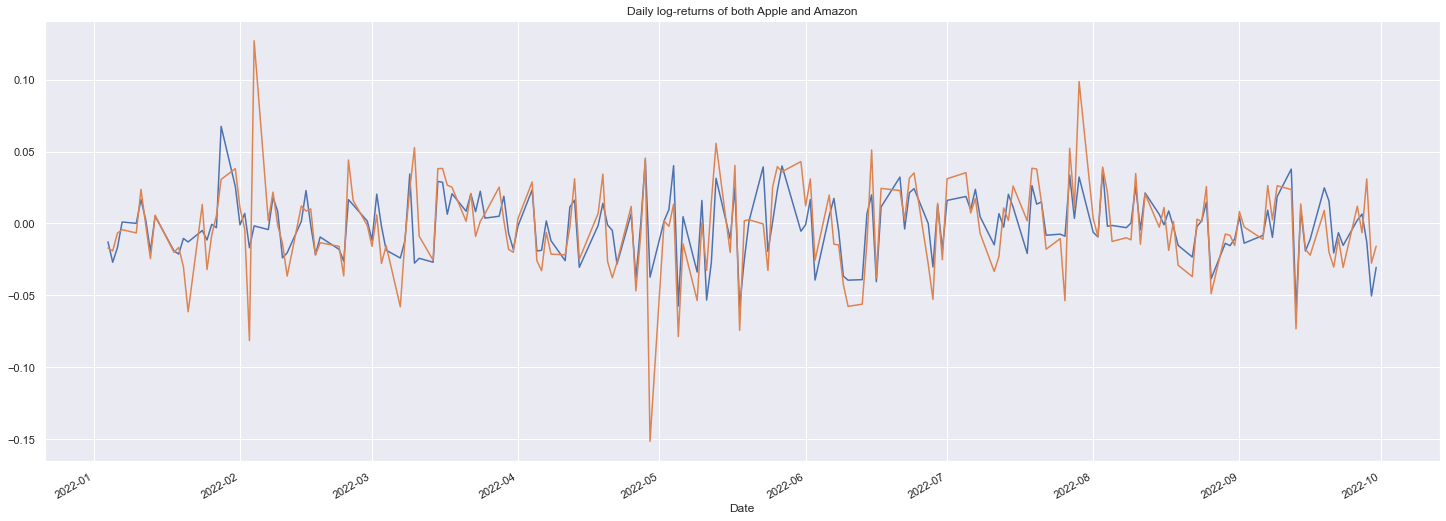

In [76]:
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (25, 9)

#plotting the daily log-return of both companies, on the same graph
apple_log_return.plot(label='Apple Log-returns', title='Daily log-returns of both Apple and Amazon') 
amazon_log_return.plot(label='Amazon Log-returns', title='Daily log-returns of both Apple and Amazon')

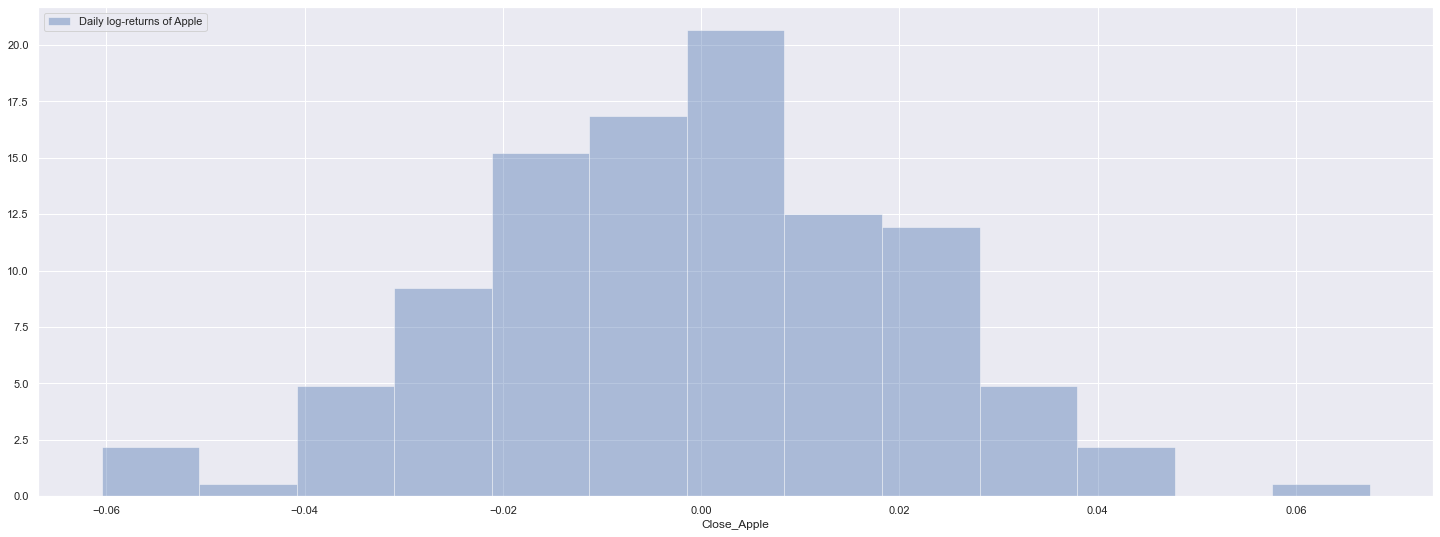

In [77]:
import seaborn as sns

#plotting the histogram of Apple's daily log-returns
sns.distplot(apple_log_return, kde=False, norm_hist=True,label='Daily log-returns of Apple') 

legend(loc='upper left');

plt.show()

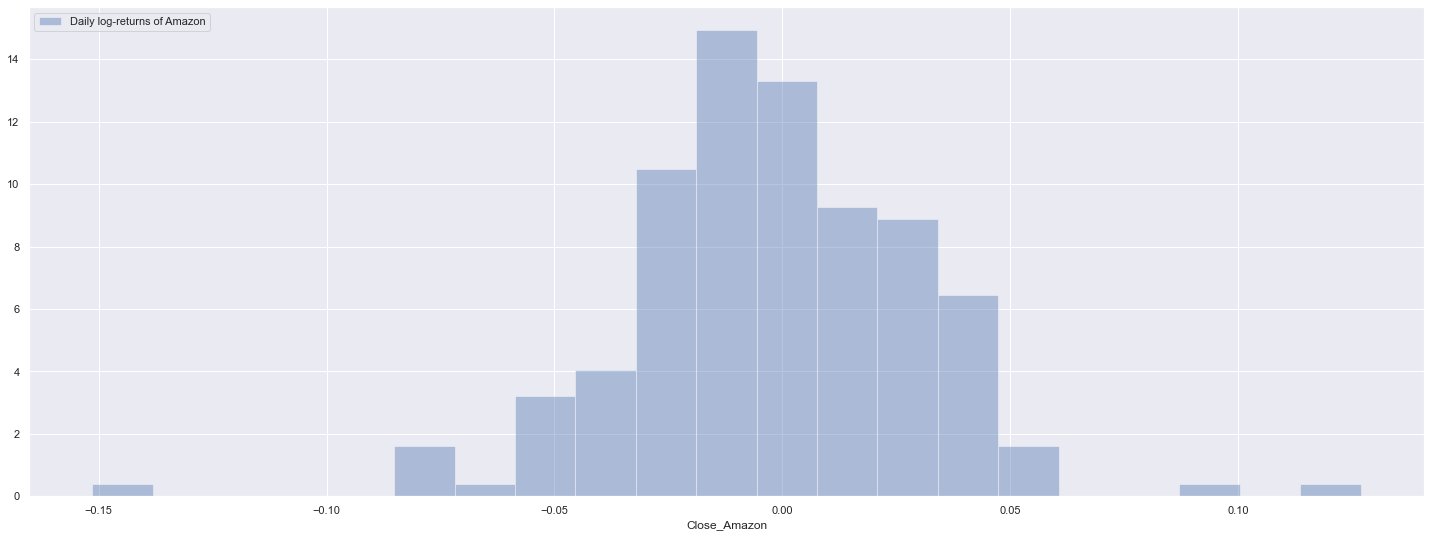

In [78]:
import seaborn as sns

#plotting the histogram of Amazon's daily log-returns
sns.distplot(amazon_log_return, kde=False, norm_hist=True,label='Daily log-returns of Amazon') 

legend(loc='upper left');

plt.show()

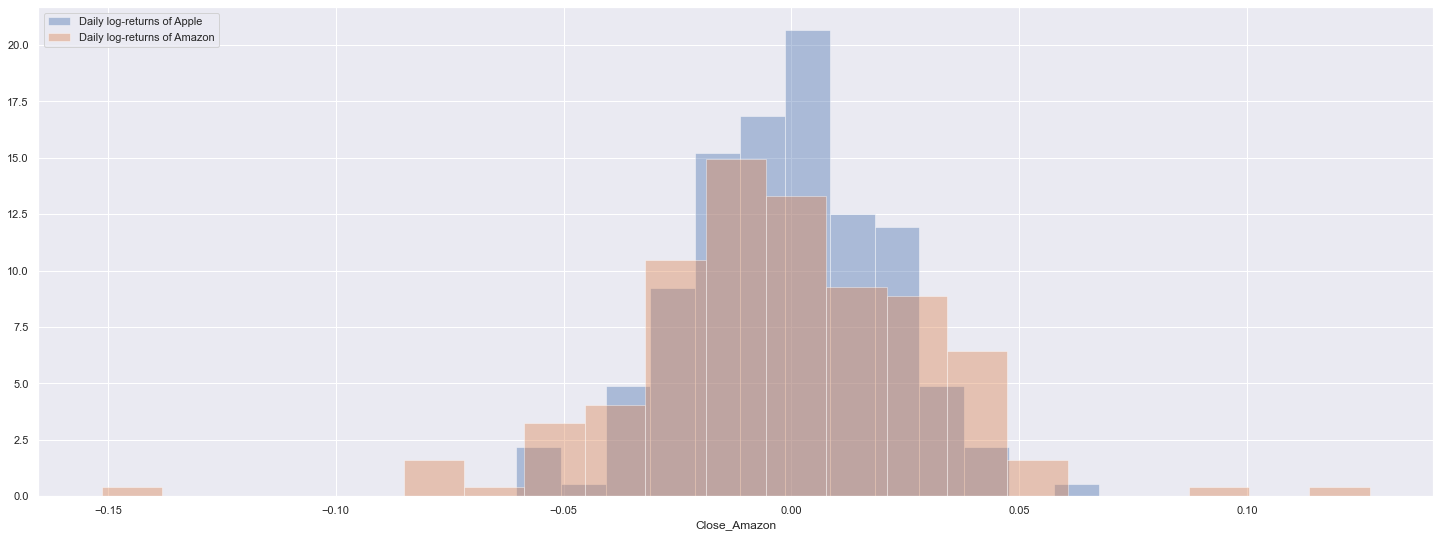

In [79]:
import seaborn as sns

#plotting the combined histogram of both daily log-returns
sns.distplot(apple_log_return, kde=False, norm_hist=True,label='Daily log-returns of Apple') 
sns.distplot(amazon_log_return, kde=False, norm_hist=True, label='Daily log-returns of Amazon')  

legend(loc='upper left');

plt.show()

In [87]:
#importing the library
from scipy.stats import skew
  
#calculating the skewness of the Apple's daily log-returns
print('The skewness of the Apple\'s daily log-returns: '+ str(skew(apple_log_return, axis=0, bias=True)))

#calculating the skewness of the Amazon's daily log-returns
print('The skewness of the Amazon\'s daily log-returns: '+ str(skew(amazon_log_return, axis=0, bias=True)))

The skewness of the Apple's daily log-returns: -0.12928308769939742
The skewness of the Amazon's daily log-returns: -0.24340385880106805


In [89]:
#importing the library 
from scipy.stats import kurtosis

#calculating the kurtosis of the Apple's daily log-returns
print('The kurtosis of the Apple\'s daily log-returns: '+ str(kurtosis(apple_log_return, axis=0, bias=True)))

#calculating the kurtosis of the Amazon's daily log-returns
print('The kurtosis of the Amazon\'s daily log-returns: '+ str(kurtosis(amazon_log_return, axis=0, bias=True)))

The kurtosis of the Apple's daily log-returns: 0.2250565038802117
The kurtosis of the Amazon's daily log-returns: 3.222526434258186
